# Ethique et responsabilité jeu de donné

<Axes: >

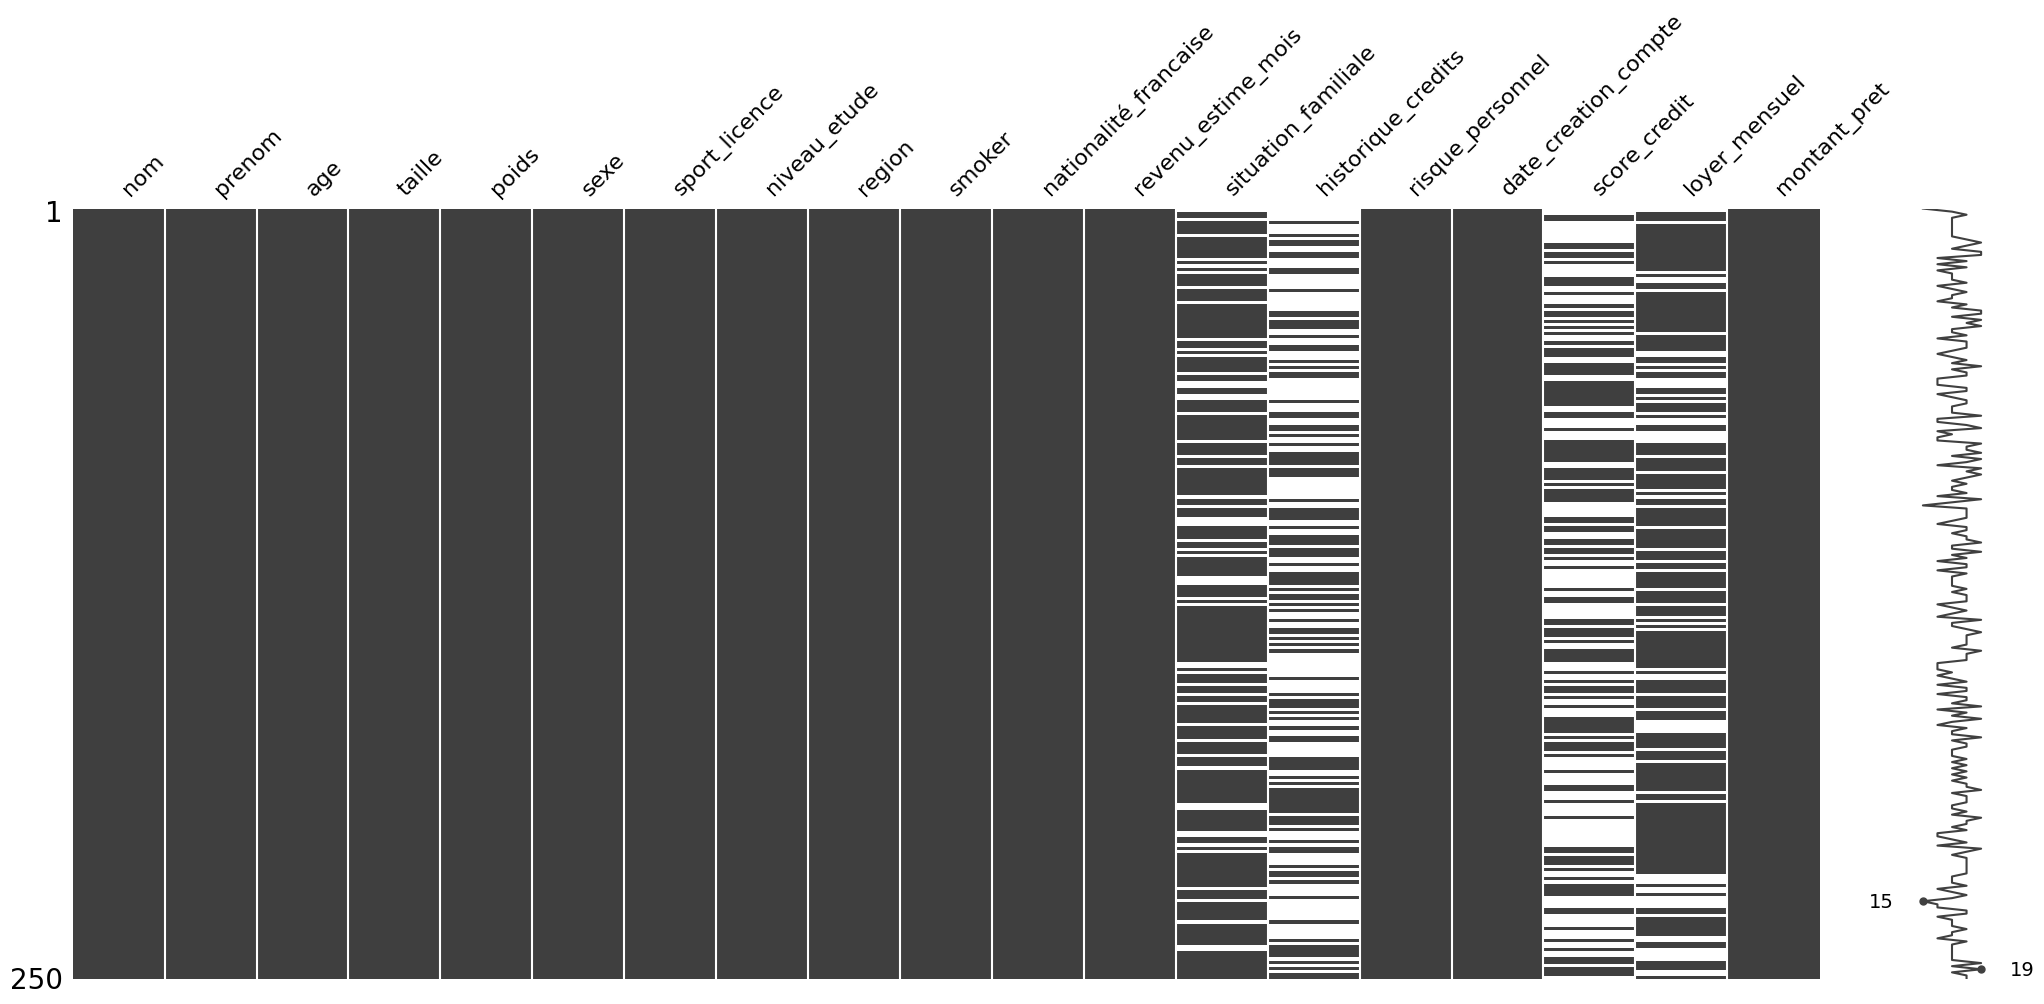

In [3]:
import pandas as pd
from os.path import join as join
collisions = pd.read_csv(join('../data', "data-all-684bf775c031b265646213.csv"))
import missingno as msno
%matplotlib inline
msno.matrix(collisions.sample(250))

In [4]:
collisions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nom                    10000 non-null  object 
 1   prenom                 10000 non-null  object 
 2   age                    10000 non-null  int64  
 3   taille                 10000 non-null  float64
 4   poids                  10000 non-null  float64
 5   sexe                   10000 non-null  object 
 6   sport_licence          10000 non-null  object 
 7   niveau_etude           10000 non-null  object 
 8   region                 10000 non-null  object 
 9   smoker                 10000 non-null  object 
 10  nationalité_francaise  10000 non-null  object 
 11  revenu_estime_mois     10000 non-null  int64  
 12  situation_familiale    7545 non-null   object 
 13  historique_credits     4692 non-null   float64
 14  risque_personnel       10000 non-null  float64
 15  dat

## analyse :
historique_credits et score_credit sont trop vides pour être utiles.
situation_familiale et loyer_mensuel doivent etre rempli


      

In [5]:
collisions.describe()

,age,taille,poids,revenu_estime_mois,historique_credits,risque_personnel,score_credit,loyer_mensuel,montant_pret
count,10000.000000,10000.00000,10000.000000,10000.000000,4692.000000,10000.000000,4744.000000,7029.000000,10000.000000
mean,46.678800,169.98452,69.864350,2513.953300,2.506820,0.502380,574.779722,5306.473284,8063.179078
std,16.669812,9.88310,14.808592,1142.281228,1.688411,0.290901,154.978890,3773.366242,10781.678081
min,18.000000,129.80000,11.700000,500.000000,0.000000,0.000000,300.000000,-245.100000,500.000000
25%,32.000000,163.40000,59.700000,1688.000000,1.000000,0.250000,443.000000,1007.750000,500.000000
50%,47.000000,170.00000,69.800000,2496.000000,3.000000,0.500000,574.000000,5000.000000,646.306057
75%,61.000000,176.60000,80.000000,3294.000000,4.000000,0.760000,705.000000,10000.000000,13755.555527
max,75.000000,208.40000,132.200000,7358.000000,5.000000,1.000000,849.000000,10000.000000,60000.000000


# Action sur le dataset : 


## Nettoyage et remplissage des colonnes

 ### On vire car pas RGPD et pas éthique
Nom et prénon, c'est NON !

In [6]:
collisions.drop(columns=['nom'], inplace=True, errors='ignore')
collisions.drop(columns=['prenom'], inplace=True, errors='ignore')

 ### On vire car pas éthique
 influence du sexe et de la nationalité sont discréminants

In [7]:
collisions.drop(columns=['sexe'], inplace=True, errors='ignore')
collisions.drop(columns=['nationalité_francaise'], inplace=True, errors='ignore')

 ### On rempli les colonnes manquantes avec la moyenne ou avec la mod

In [8]:
 ### on rempli loyer mensuel avec la moyenne 
collisions['loyer_mensuel'] = collisions['loyer_mensuel'].fillna(collisions['loyer_mensuel'].mean())
collisions['situation_familiale'] = collisions['situation_familiale'].fillna(collisions['situation_familiale'].mode()[0])

# On filtres les outliers : poids incohérent ou loyer négatif

In [9]:
### filter outlers values
collisions = collisions[(collisions['poids'] > 30) & (collisions['loyer_mensuel'] > 0)]

### On supprime les colonnes qui ne font pas sens ou qui peuvent permettre de reconstruire une identité (Attaque de reconstruction)

In [10]:
collisions.drop(columns=['date_creation_compte'], inplace=True, errors='ignore')

### On vire car trop peu de données

In [ ]:

#collisions.drop(columns=['score_credit'], inplace=True, errors='ignore')
#collisions.drop(columns=['historique_credits'], inplace=True, errors='ignore')

# EDIT : Changement de stratégy, ces colonne seront complété à la moyenne en ajoutant une colonne pour indiquer si la valeur était manquante à la base ou non

# Dataset Final

In [12]:
collisions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9947 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9947 non-null   int64  
 1   taille               9947 non-null   float64
 2   poids                9947 non-null   float64
 3   sport_licence        9947 non-null   object 
 4   niveau_etude         9947 non-null   object 
 5   region               9947 non-null   object 
 6   smoker               9947 non-null   object 
 7   revenu_estime_mois   9947 non-null   int64  
 8   situation_familiale  9947 non-null   object 
 9   risque_personnel     9947 non-null   float64
 10  loyer_mensuel        9947 non-null   float64
 11  montant_pret         9947 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 1010.2+ KB


## Définition des colonnes numériques / categorielles
on défini les colonnes numériques et catégorielles pour les entrainnements de modèles

In [ ]:
numerical_cols = ["age", "taille", "poids", "revenu_estime_mois", "risque_personnel", "loyer_mensuel"]    
# Ajout situation familiales
categorical_cols = ["sport_licence", "niveau_etude", "region", "smoker", "situation_familiale"]
# ajout d'une catégorie pour les valeurs manquantes à compléter à la moyenne et à ajouter dans une colonne boolean
missings_cols = ["score_credit", "historique_credits"]

In [13]:
# Sauvegarde du dataset nettoyé
collisions.to_csv(join('../data', 'df_data_all_cleaned.csv'), index=False)

<Axes: >

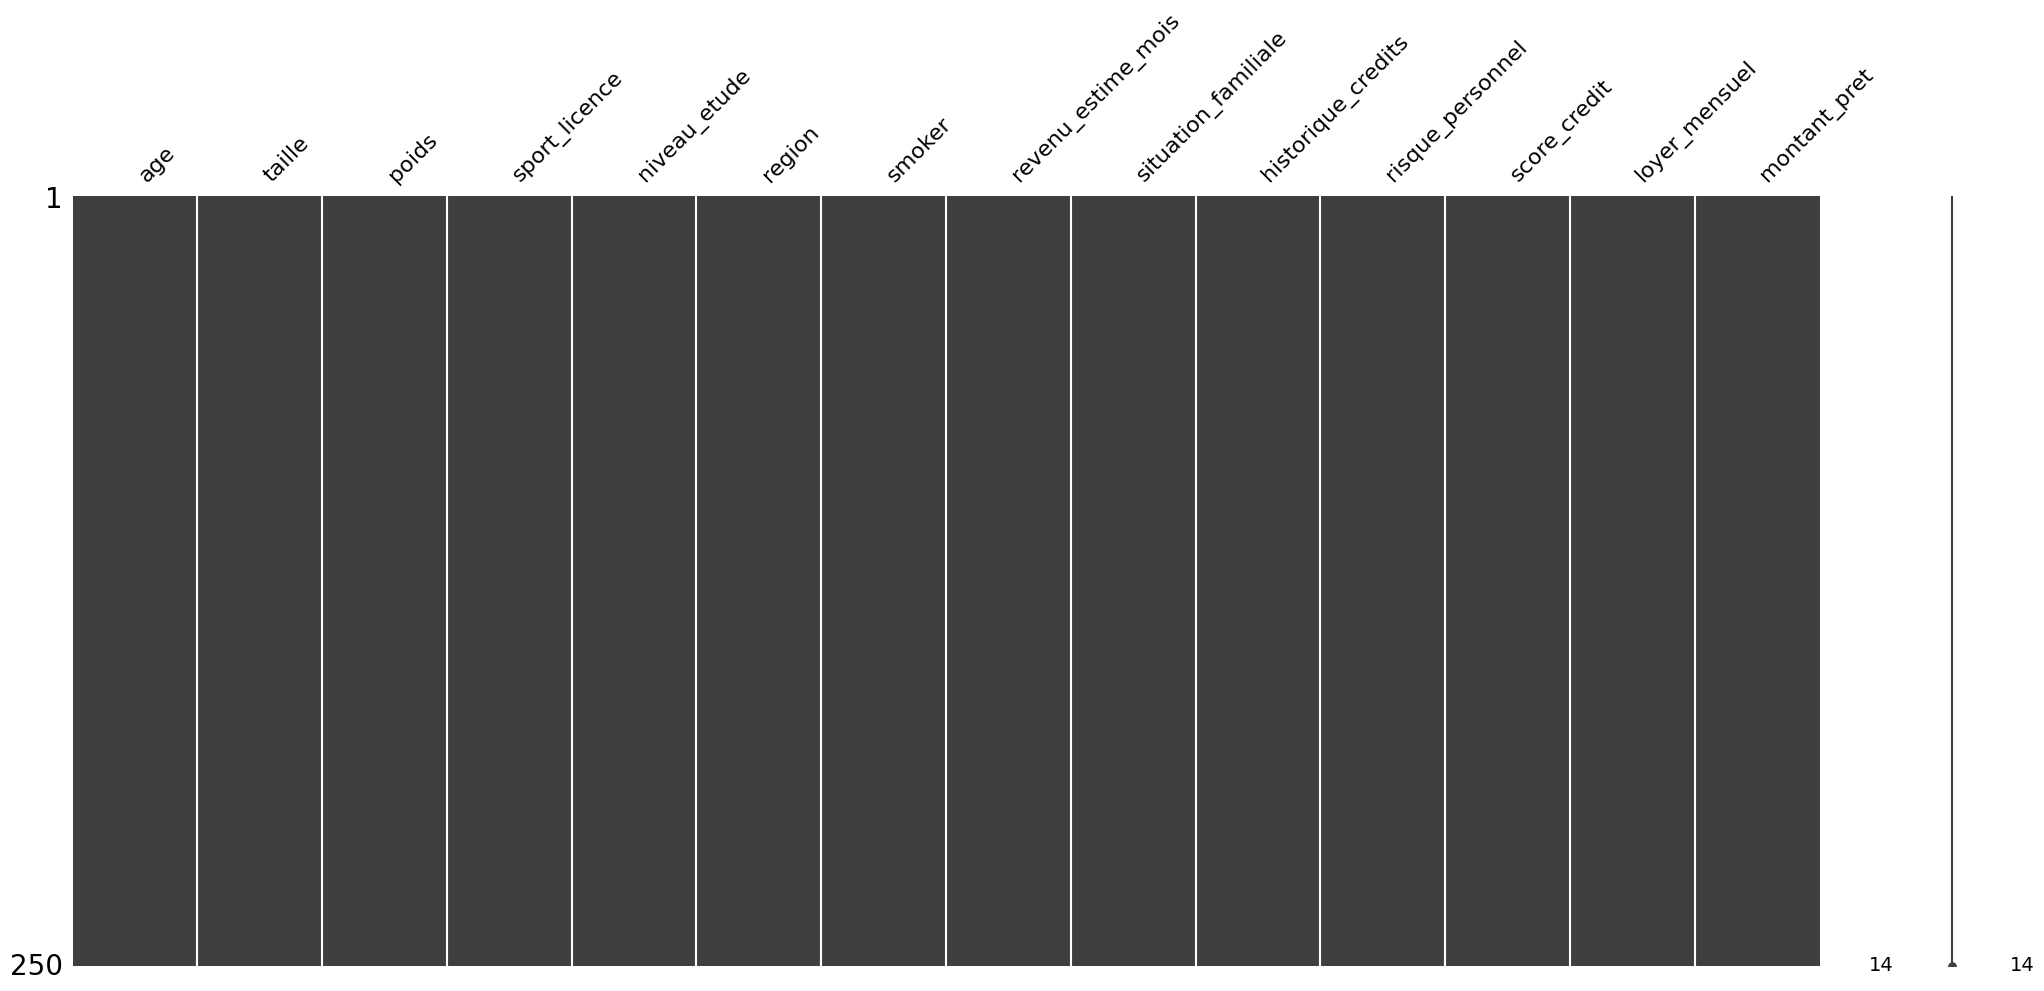

In [4]:
import pandas as pd
from os.path import join as join
collisions = pd.read_csv(join('../data', "df_data_all_cleaned.csv"))
import missingno as msno
%matplotlib inline
msno.matrix(collisions.sample(250))

In [5]:
collisions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9947 entries, 0 to 9946
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9947 non-null   int64  
 1   taille               9947 non-null   float64
 2   poids                9947 non-null   float64
 3   sport_licence        9947 non-null   object 
 4   niveau_etude         9947 non-null   int64  
 5   region               9947 non-null   object 
 6   smoker               9947 non-null   object 
 7   revenu_estime_mois   9947 non-null   int64  
 8   situation_familiale  9947 non-null   object 
 9   historique_credits   9947 non-null   float64
 10  risque_personnel     9947 non-null   float64
 11  score_credit         9947 non-null   float64
 12  loyer_mensuel        9947 non-null   float64
 13  montant_pret         9947 non-null   float64
dtypes: float64(7), int64(3), object(4)
memory usage: 1.1+ MB


In [3]:
collisions.describe()

,age,taille,poids,niveau_etude,revenu_estime_mois,historique_credits,risque_personnel,score_credit,loyer_mensuel,montant_pret
count,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000
mean,46.690661,169.994581,70.069629,1.987132,2513.507691,2.507137,0.502429,574.835020,5311.639549,8057.030652
std,16.671949,9.876233,14.533328,1.398138,1141.120936,1.156350,0.291071,106.719050,3159.405876,10770.363712
min,18.000000,129.800000,30.500000,0.000000,500.000000,0.000000,0.000000,300.000000,5.330000,500.000000
25%,32.000000,163.400000,59.900000,1.000000,1688.000000,2.506820,0.250000,574.779722,5000.000000,500.000000
50%,47.000000,170.000000,69.900000,2.000000,2496.000000,2.506820,0.500000,574.779722,5306.473284,643.854116
75%,61.000000,176.600000,80.050000,3.000000,3294.000000,2.506820,0.760000,574.779722,5306.473284,13769.370787
max,75.000000,208.400000,132.200000,4.000000,7358.000000,5.000000,1.000000,849.000000,10000.000000,60000.000000
